## 일표본 이항(비율) 차이분석 ==> bi-nominal test

In [15]:
# -*- coding: utf-8 -*-
#컨벤션
%matplotlib inline
from pandas import DataFrame, Series
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels

In [16]:
#skipinitialspace 컬럼의 빈칸 없애고 전체 자료 읽어 들이기
my_df = pd.read_csv('coupon.csv', skipinitialspace=True)

In [17]:
#변수 확인
my_df.head()
my_df.tail()
my_df.info()
my_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
no          201 non-null int64
type        201 non-null int64
category    117 non-null float64
amount      117 non-null float64
week        117 non-null float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB


,no,type,category,amount,week
count,201.000000,201.000000,117.000000,117.000000,117.000000
mean,149.323383,1.437811,2.495726,86906.837607,0.555556
std,87.036429,0.497356,1.118989,39082.919645,0.499041
min,1.000000,1.000000,1.000000,18500.000000,0.000000
25%,74.000000,1.000000,2.000000,63000.000000,0.000000
50%,149.000000,1.000000,2.000000,82400.000000,1.000000
75%,224.000000,2.000000,3.000000,107000.000000,1.000000
max,300.000000,2.000000,4.000000,187400.000000,1.000000


In [18]:
#response 파생변수 컬럼에 추가하기
my_df['response'] = [0 if np.isnan(x) else 1 for x in my_df.amount]
my_df[['amount','response']]

,amount,response
0,99300.0,1
1,98300.0,1
2,NaN,0
3,NaN,0
4,NaN,0
5,40900.0,1
6,76400.0,1
7,83800.0,1
8,155000.0,1
9,102800.0,1


In [19]:
#파생변수 빈도 및 비율 분석
print(my_df.response.value_counts(normalize=False, sort=False))
print(my_df.response.value_counts(normalize=True, sort=False))

0     84
1    117
Name: response, dtype: int64
0    0.41791
1    0.58209
Name: response, dtype: float64


In [20]:
#레이블 선언
response_lables = {0: 'not used', 1: 'used'}
response_fq = my_df.response.apply(lambda x: response_lables[x]).value_counts(normalize=False, sort=False)
response_rt = my_df.response.apply(lambda x: response_lables[x]).value_counts(normalize=True, sort=False)
print(response_fq)
print(response_rt)

not used     84
used        117
Name: response, dtype: int64
not used    0.41791
used        0.58209
Name: response, dtype: float64


In [21]:
response_fq[0]

84

In [22]:
response_fq[1]

117

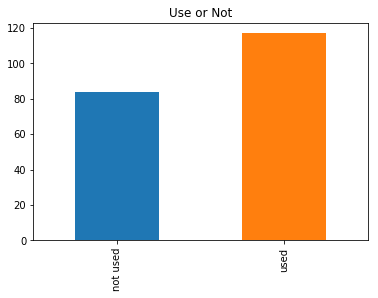

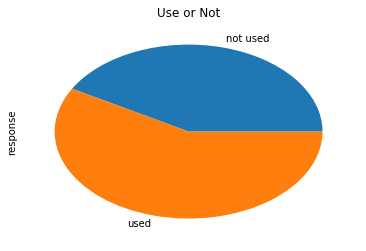

In [23]:
#막대그래프(레이블 있음)
plt.figure(1)
response_fq.plot(kind='bar', title='Use or Not')
plt.figure(2)
response_fq.plot(kind='pie', title='Use or Not')

In [24]:
my_df.response

0      1
1      1
2      0
3      0
4      0
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     0
15     0
16     0
17     0
18     1
19     1
20     1
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
171    0
172    0
173    0
174    0
175    0
176    1
177    1
178    0
179    1
180    1
181    0
182    1
183    0
184    1
185    0
186    1
187    0
188    1
189    1
190    0
191    1
192    1
193    1
194    1
195    1
196    0
197    0
198    0
199    1
200    1
Name: response, Length: 201, dtype: int64

In [25]:
response_fq[0]

84

In [26]:
#이항 검정

#stats.binom_test(count, n=nobs, p=prop) 양측(two-side)
#stats.binom.sf(count-1, nobs, prop) 오른쪽 꼬리(greater)
#stats.binom.cdf(count, nobs, prop) 왼쪽 꼬리(less)
# ==> 또는 binom_test()에서 alternative=two-sided, greater, less로 선정해 양측검정/단측검정을 선택할 수 있음
#x = stats.binom_test(response_fq[1], n=len(my_df.response), p=0.50)
x = stats.binom.sf(response_fq[1]-1, n=len(my_df.response), p=0.50)
#x = stats.binom.cdf(response_fq[1], n=len(my_df.response), p=0.50)
print(x)

0.011880587943318519


In [30]:
print("p-value = %4.3f" % x)

p-value = 0.012


In [33]:
#이항검정(적합도 검정)
#y = stats.binom_test(response_fq[1], n=len(my_df.response), p=0.50)
y = stats.binom.sf(response_fq[1]-1, n=len(my_df.response), p=0.50)
#y = stats.binom.cdf(response_fq[1], n=len(my_df.response), p=0.50)
print("쿠폰이벤트 반응성공기준이 50퍼센트 일때: p-value = %4.3f" % y)

쿠폰이벤트 반응성공기준이 50퍼센트 일때: p-value = 0.012


## end of documents